In [5]:
# 3강은 cost 함수를 minimize하는 gradient descent 알고리즘을 배웠음
# 요약하자면 W = W - learning_rate*cost함수미분값

import tensorflow.compat.v1 as tf
tf.disable_v2_behavior()
import matplotlib.pyplot as plt

In [6]:
X = [1,2,3]
Y = [1,2,3]

# 변수 생성
W = tf.placeholder(tf.float32)

# 가설
hypothesis = X*W # 행렬곱
# 비용함수
cost = tf.reduce_mean(tf.square(hypothesis-Y))

# minimize - 수동 조절
# learning_rate = 0.1
# gradient = tf.reduce_mean((W*X - Y)*X)
# descent = W - learning_rate*gradient
# update = W.assign(descent)

# minimize - 자동 조절 : 미분 알아서 해줌
optimizer = tf.train.GradientDescentOptimizer(learning_rate = 0.1)
train = optimizer.minimize(cost)

# 세션 생성
sess = tf.Session()

# 실행 전 변수 초기화
sess.run(tf.global_variables_initializer())

W_val = []     # 그래프 그리기위해 변하는 값들 배열에 넣어놓음
cost_val = []  # 그래프 그리기위해 변하는 값들 배열에 넣어놓음

# 실행
for i in range(-30, 50):
    feed_W = i*0.1 # W를 -3.0 ~ 5.0 사이 움직이겠다. 
    curr_cost, curr_W = sess.run([cost, W], feed_dict={W: feed_W})
    W_val.append(curr_W)
    cost_val.append(curr_cost)
    
plt.plot(W_val, cost_val)
plt.show()

AttributeError: 'Tensor' object has no attribute 'assign'

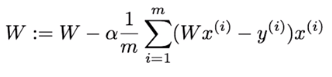

In [ ]:
# 이번 강의의 핵심은 위의 값. cost함수를 W에 대해 미분한 값으로 피드백하며 W를 조정해 나감.



In [7]:
# 나중에 gradient를 직접 조작하고 싶어지면 아래와 같이 조작 가능

# Get gradients
gvs = optimizer.compute_gradients(cost)

# Optional: modify gradient if necessary
# gvs = [(tf.clip_by_value(grad, -1., 1.), var) for grad, var in gvs]

# Apply gradients - 이부분에서 gvs를 맘대로 조작
# apply_gradients = optimizer.apply_gradients(gvs)
apply_gradients = optimizer.apply_gradients(gvs*0.1)
apply_gradients = optimizer.apply_gradients(gvs*0.4)

NameError: name 'optimizer' is not defined